<h2>Overview</h2>
<br>
<b>goal: </b> Perform a sentiment analysis classification at Hotel Monaco based on data on TripAdvisor with a logistic regression algorithm.
<br>
<br>
formulation of the problem:<p>
1. How can sentiment analysis with logistic regression algorithms help Monaco Hotel determine the level of tourist satisfaction with the services provided by Monaco Hotel? <br>
2. How does sentiment analysis predict the result of the next review of Monaco Hotel from traveler reviews on TripAdvisor? <br>
3. What suggestions can be given from the sentiment analysis carried out on hotel reviews by the TripAdvisor website towards the development and improvement of the Monaco Hotel?
<br>
<br>
This project was created to fulfill the requirements for graduation from an independent campus in the Data Analytics Independent Study program from GreatEdu and implement the material learned in the Data Analytics Independent Study program. In addition, with the sentiment analysis carried out, it is hoped that it can help Monaco Hotel in determining the next actions and policies in order to continue to improve the quality and comfort of the hotel. <br>
    <br>

<h2>Let's Understand What is Sentiment Analysis?</h2>
Sentiment analysis is a simple way to assess opinions or sentiments in a sentence to determine someone's opinion on a particular topic.

<br>

---
## Install Library has needed
---

In [1]:
# Import the library has needed
import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split #separate words to be data test & data train
from sklearn.linear_model import LogisticRegression #logistic regression is the linear regression model
from sklearn.metrics import confusion_matrix, classification_report #view the performance of evaluation model using confusion metrics and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<br>

---
## Understanding the data
---

In [2]:
# read monaco hotel data review as raw data
trip_advisor = pd.read_csv("tripadvisor_hotel_reviews.csv")
trip_advisor

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
# read monaco hotel data review as new data
monaco_hotel = pd.read_csv("Monaco_hotel_data_review.csv")
monaco_hotel

,Review,Rating,count_word,count_chart,sentimen,Date,country
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,733,positive,27/07/2021,Spanyol
20487,great location price view hotel great quick pl...,4,39,306,positive,25/08/2021,Malaysia
20488,"ok just looks nice modern outside, desk staff ...",2,63,443,negative,02/09/2021,Spanyol
20489,hotel theft ruined vacation hotel opened sept ...,1,781,5557,negative,23/12/2022,Spanyol


In [4]:
monaco_hotel.head()

,Review,Rating,count_word,count_chart,sentimen,Date,country
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol


In [5]:
monaco_hotel.tail()

,Review,Rating,count_word,count_chart,sentimen,Date,country
20486,"best kept secret 3rd time staying charm, not 5...",5,109,733,positive,27/07/2021,Spanyol
20487,great location price view hotel great quick pl...,4,39,306,positive,25/08/2021,Malaysia
20488,"ok just looks nice modern outside, desk staff ...",2,63,443,negative,02/09/2021,Spanyol
20489,hotel theft ruined vacation hotel opened sept ...,1,781,5557,negative,23/12/2022,Spanyol
20490,"people talking, ca n't believe excellent ratin...",2,90,620,negative,24/12/2022,Malaysia


In [6]:
# show the column that has of the data
print(len(monaco_hotel))
print(monaco_hotel.columns.to_list())

20491
['Review', 'Rating', 'count_word', 'count_chart', 'sentimen', 'Date', 'country']


<br>

---
## Data Cleansing
---

In [7]:
# check for nulls
monaco_hotel.isna().sum()

Review         0
Rating         0
count_word     0
count_chart    0
sentimen       0
Date           0
country        0
dtype: int64

In [8]:
# check for empty string reviews
len(monaco_hotel[monaco_hotel.Review == ''])

0

In [9]:
# check duplicate value
monaco_hotel.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20486    False
20487    False
20488    False
20489    False
20490    False
Length: 20491, dtype: bool

In [10]:
monaco_hotel.dropna()

,Review,Rating,count_word,count_chart,sentimen,Date,country
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,733,positive,27/07/2021,Spanyol
20487,great location price view hotel great quick pl...,4,39,306,positive,25/08/2021,Malaysia
20488,"ok just looks nice modern outside, desk staff ...",2,63,443,negative,02/09/2021,Spanyol
20489,hotel theft ruined vacation hotel opened sept ...,1,781,5557,negative,23/12/2022,Spanyol


In [11]:
# drop duplicate value
monaco_hotel.drop_duplicates()

,Review,Rating,count_word,count_chart,sentimen,Date,country
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,733,positive,27/07/2021,Spanyol
20487,great location price view hotel great quick pl...,4,39,306,positive,25/08/2021,Malaysia
20488,"ok just looks nice modern outside, desk staff ...",2,63,443,negative,02/09/2021,Spanyol
20489,hotel theft ruined vacation hotel opened sept ...,1,781,5557,negative,23/12/2022,Spanyol


<br>

---
## Text Preprocessing 
---

In [43]:
monaco_hotel.head(40)

,Review,Rating,count_word,count_chart,sentimen,Date,country,cleansed_review
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey,nice hotel expensive park get good deal stay h...
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA,nothing special charge diamond member decide c...
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy,nice experience hotel good hotel large bathroo...
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy,unique great stay wonderful time hotel locatio...
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol,great stay great stay go game awesome downfall...
5,love monaco staff husband stayed hotel crazy w...,5,134,1002,positive,30/12/2022,Turkey,love staff husband stay hotel crazy weekend me...
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,748,positive,31/03/2021,USA,cozy stay rainy city husband spend nights earl...
7,"excellent staff, housekeeping quality hotel ch...",4,85,597,positive,21/01/2020,Turkey,excellent staff housekeep quality hotel staff ...
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59,419,positive,03/09/2022,Italy,hotel stay hotel cruise generous decorate uniq...
9,excellent stayed hotel monaco past w/e delight...,5,35,271,positive,17/10/2022,Turkey,excellent stay hotel past delight reception st...


In [13]:
# case folding. change a sentence to be lower case
monaco_hotel['cleansed_review'] = monaco_hotel['Review'].str.lower()

In [14]:
# remove numeric value
monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].str.replace('\d+', '',regex=True)

In [15]:
#remove symbol
monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].replace(r'[^\w\s]|_', '', regex=True)

In [16]:
# remove punctuation
monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].str.replace('[^\w\s]','',regex=True)

In [17]:
# remove meaningless words using nltk
def clean_sent(sent):
    return " ".join(w for w in nltk.wordpunct_tokenize(sent) \
     if w.lower() in words or not w.isalpha())
monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].apply(clean_sent)

In [18]:
#remove stop-words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Remove Stop Words from Text in DataFrame Column
stop_words = stopwords.words('english')
monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
# Stemming and Lemmatization
def stemming_lemmatizing(text):
    clean_text = text.split()
    
    #stemming
    sentence = []
    for word in clean_text:
        stemmer = SnowballStemmer('english')
        sentence.append(stemmer.stem(word))    
    #lematizing
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))
    
    return ' '.join(sentence)

monaco_hotel['cleansed_review'] = monaco_hotel['cleansed_review'].apply(stemming_lemmatizing)

In [21]:
monaco_hotel['cleansed_review']

0        nice hotel expensive park get good deal stay h...
1        nothing special charge diamond member decide c...
2        nice experience hotel good hotel large bathroo...
3        unique great stay wonderful time hotel locatio...
4        great stay great stay go game awesome downfall...
                               ...                        
20486    best keep secret time charm star ca beat time ...
20487    great location price view hotel great quick pl...
20488    nice modern outside desk staff particularly fr...
20489    hotel theft ruin vacation hotel sept week happ...
20490    people talk ca believe excellent hotel yes ext...
Name: cleansed_review, Length: 20491, dtype: object

In [22]:
monaco_hotel['sentimen']

0        positive
1        negative
2         neutral
3        positive
4        positive
           ...   
20486    positive
20487    positive
20488    negative
20489    negative
20490    negative
Name: sentimen, Length: 20491, dtype: object

---
## Building Model With Sklearn
---

In [23]:
# x_train = sentiment (dependent variable)
# y_train, y_test = review
x_train,x_test, y_train, y_test = train_test_split(monaco_hotel['cleansed_review'],
                                                   monaco_hotel['sentimen'], 
                                                   test_size = 0.2, random_state=42)

In [24]:
tfidf = TfidfVectorizer()
data_train = tfidf.fit_transform(x_train)
data_test = tfidf.transform(x_test)

In [25]:
log = LogisticRegression(penalty='l2',max_iter=1000)
log.fit(data_train, y_train) #how computer can learn from program
predict = log.predict(data_test)

In [26]:
accuracy_score(y_test, predict)

0.8567943400829471

In [27]:
print(confusion_matrix(y_test,predict))

[[ 474   40  111]
 [  88   73  271]
 [  41   36 2965]]


In [28]:
print(classification_report(y_test,predict)) 

              precision    recall  f1-score   support

    negative       0.79      0.76      0.77       625
     neutral       0.49      0.17      0.25       432
    positive       0.89      0.97      0.93      3042

    accuracy                           0.86      4099
   macro avg       0.72      0.63      0.65      4099
weighted avg       0.83      0.86      0.83      4099



<h2>Word Cloud</h2>

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
monaco_hotel.head()

,Review,Rating,count_word,count_chart,sentimen,Date,country,cleansed_review
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey,nice hotel expensive park get good deal stay h...
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA,nothing special charge diamond member decide c...
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,neutral,10/09/2022,Italy,nice experience hotel good hotel large bathroo...
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy,unique great stay wonderful time hotel locatio...
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol,great stay great stay go game awesome downfall...


In [31]:
negative_sentiment = monaco_hotel[monaco_hotel.sentimen == 'negative']

In [32]:
neutral_sentiment = monaco_hotel[monaco_hotel.sentimen == 'neutral']

In [33]:
positive_sentiment = monaco_hotel[monaco_hotel.sentimen == 'positive']

In [34]:
negative_sentiment.head()

,Review,Rating,count_word,count_chart,sentimen,Date,country,cleansed_review
1,ok nothing special charge diamond member hilto...,2,250,1689,negative,12/08/2022,USA,nothing special charge diamond member decide c...
10,"poor value stayed monaco seattle july, nice ho...",2,47,333,negative,24/08/2021,Indonesia,poor value stay nice hotel price night hotel b...
15,horrible customer service hotel stay february ...,1,214,1413,negative,29/05/2021,Indonesia,horrible customer service hotel stay th friend...
16,disappointed say anticipating stay hotel monac...,2,242,1662,negative,16/02/2020,Italy,disappoint say stay hotel base see definitely ...
24,great location need internally upgrade advanta...,2,35,250,negative,09/10/2021,USA,great location need internally upgrade advanta...


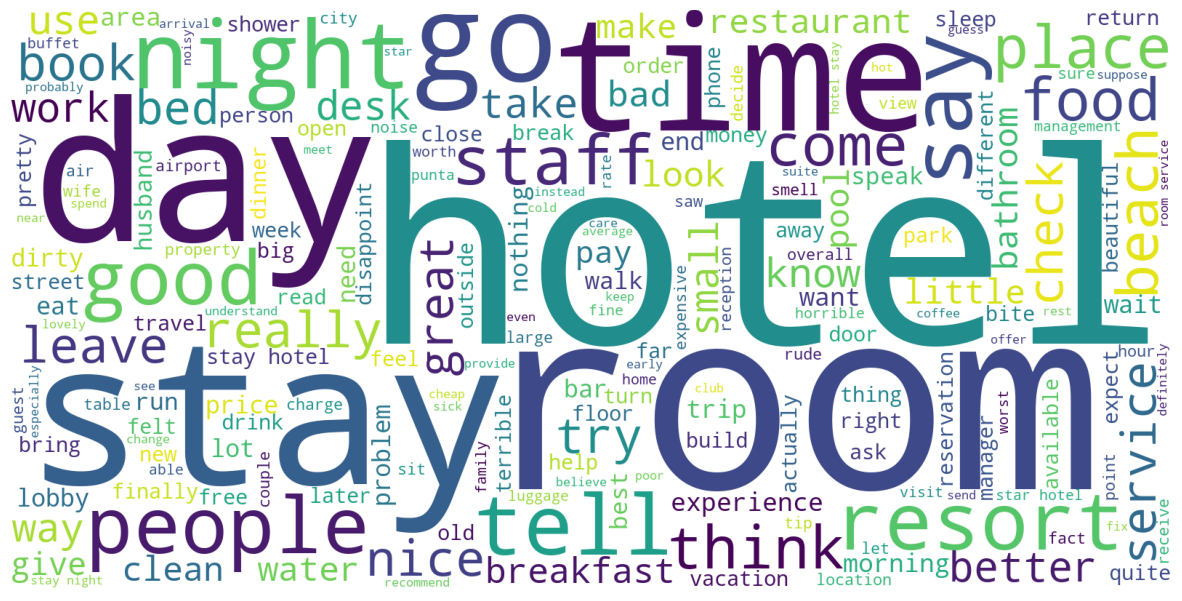

In [35]:
# make a word cloud from negative sentiment
plt.figure(figsize=(15,15))
word_cloud = WordCloud(
max_words = 200
, min_font_size = 10
, height = 800
, width = 1600
, background_color = "white"
).generate(' '.join(negative_sentiment['cleansed_review']))
plt.axis('off')

plt.imshow(word_cloud)

In [36]:
positive_sentiment.head()

,Review,Rating,count_word,count_chart,sentimen,Date,country,cleansed_review
0,nice hotel expensive parking got good deal sta...,4,87,593,positive,06/07/2021,Turkey,nice hotel expensive park get good deal stay h...
3,"unique, great stay, wonderful time hotel monac...",5,89,600,positive,25/10/2020,Italy,unique great stay wonderful time hotel locatio...
4,"great stay great stay, went seahawk game aweso...",5,191,1281,positive,18/08/2021,Spanyol,great stay great stay go game awesome downfall...
5,love monaco staff husband stayed hotel crazy w...,5,134,1002,positive,30/12/2022,Turkey,love staff husband stay hotel crazy weekend me...
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,748,positive,31/03/2021,USA,cozy stay rainy city husband spend nights earl...


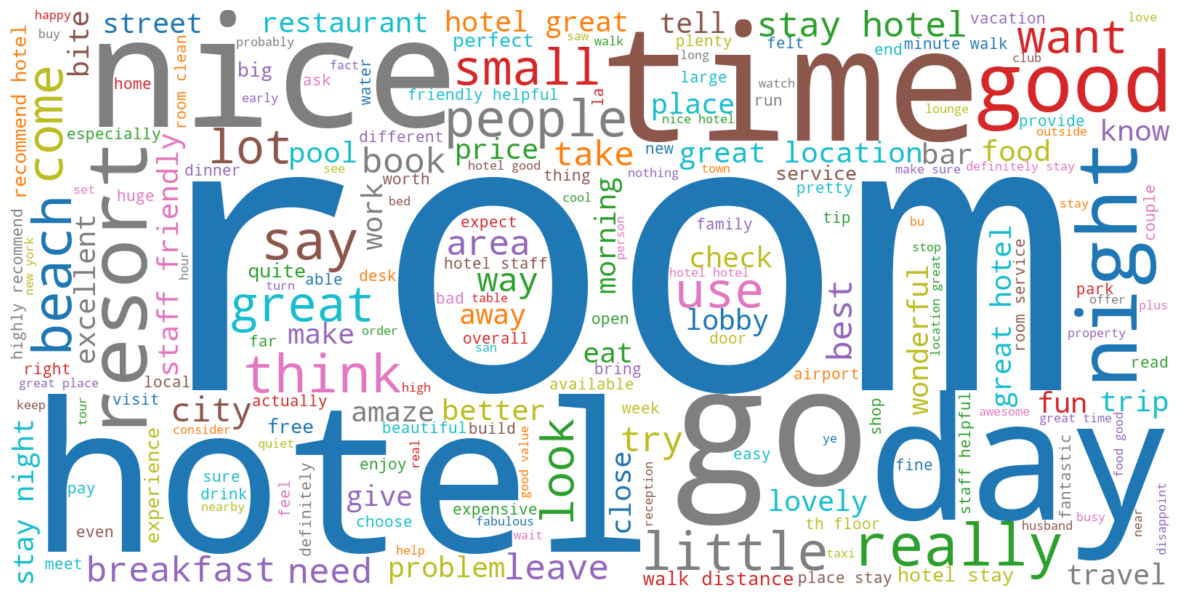

In [37]:
# make a word cloud from positive sentiment
#mask = np.array(Image.open(r'unlike.png'))
plt.figure(figsize=(15,15))
word_cloud = WordCloud(
    max_words = 200
    , min_font_size = 10
    , height = 800
    , width = 1600
    , background_color = "white"
    ,colormap = "tab10"
    , random_state=42
)
word_cloud.generate(' '.join(positive_sentiment['cleansed_review']))
plt.axis('off')

plt.imshow(word_cloud, interpolation="bilinear") #The argument 'interpolation=bilinear' is used to make the image appear smoother


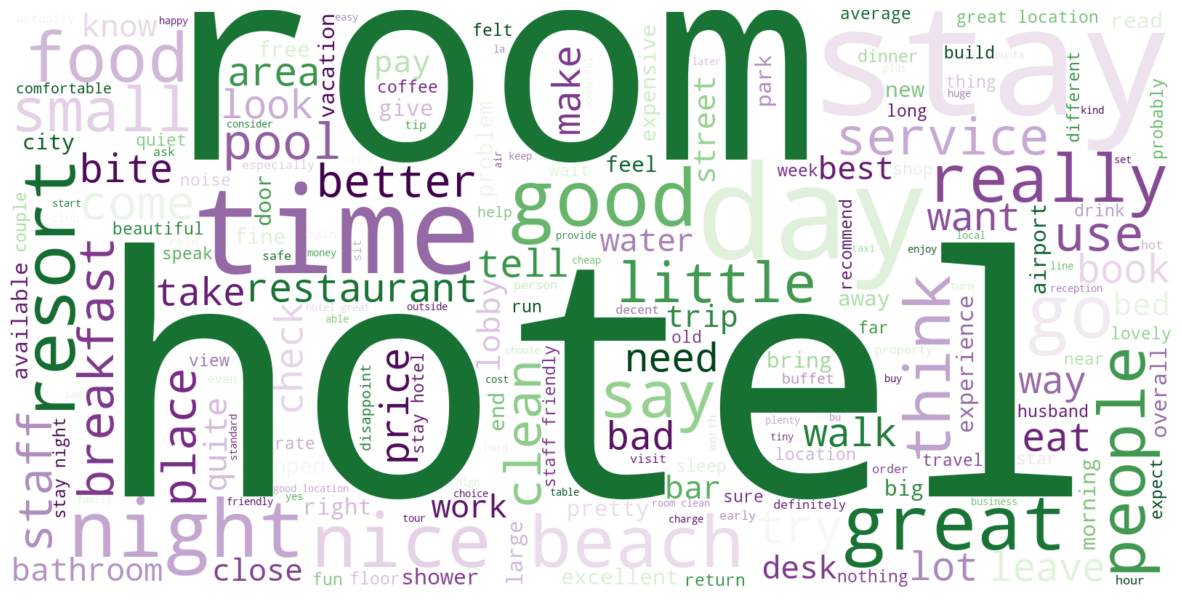

In [38]:
# make a word cloud from positive sentiment
#mask = np.array(Image.open(r'unlike.png'))
plt.figure(figsize=(15,15))
word_cloud = WordCloud(
    max_words = 200
    , min_font_size = 10
    , height = 800
    , width = 1600
    , background_color = "white"
    ,colormap = "PRGn_r"
    , random_state=42
)
word_cloud.generate(' '.join(neutral_sentiment['cleansed_review']))
plt.axis('off')

plt.imshow(word_cloud, interpolation="bilinear") #The argument 'interpolation=bilinear' is used to make the image appear smoother


## N-grams

In [39]:
def get_top_n_gram(corpus, n=None, gram=None):
    vec = CountVectorizer(ngram_range=(gram,gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

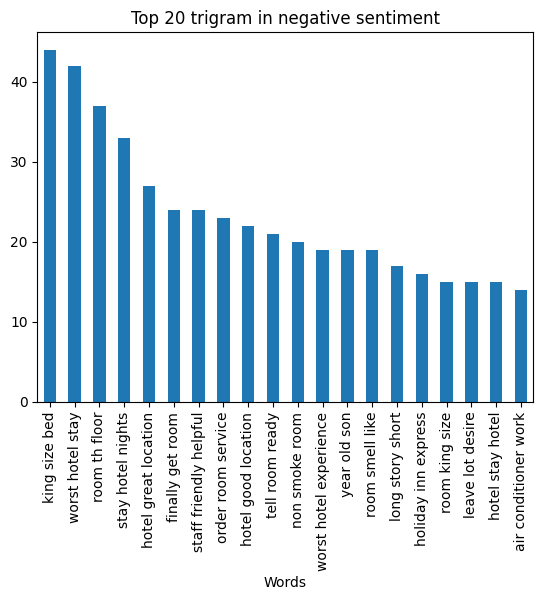

In [40]:
common_words = get_top_n_gram(negative_sentiment['cleansed_review'], 20,3)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size'] = '10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='Words', title='Top 20 trigram in negative sentiment')
plt.show()

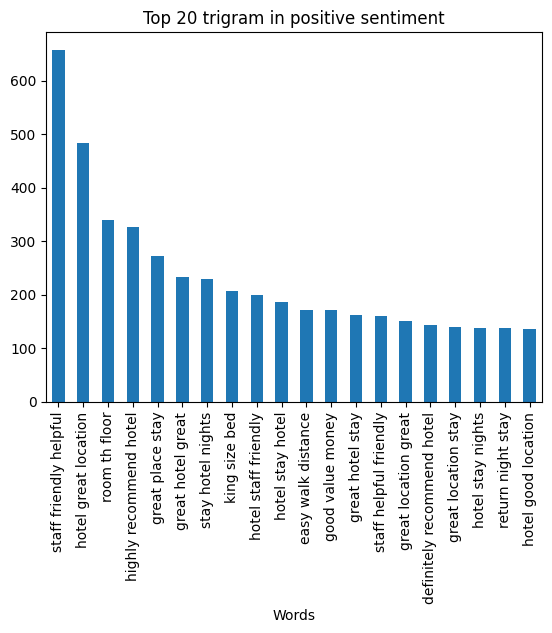

In [41]:
common_words = get_top_n_gram(positive_sentiment['cleansed_review'], 20,3)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size'] = '10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='Words', title='Top 20 trigram in positive sentiment')
plt.show()

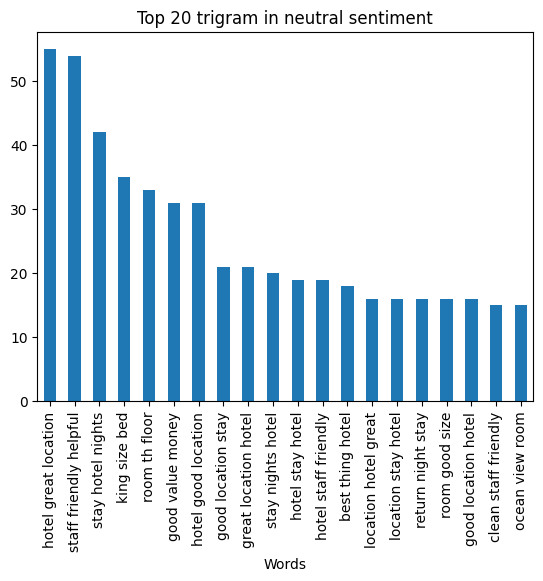

In [42]:
common_words = get_top_n_gram(neutral_sentiment['cleansed_review'], 20,3)
ngram = pd.DataFrame(common_words, columns = ['Words','count'])
plt.rcParams['font.size'] = '10'
ngram.groupby('Words').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', x='count', y='Words', title='Top 20 trigram in neutral sentiment')
plt.show()